# 1. Рекомендательные системы

> **Рекомендательные системы** - это один из ярких представителей удачной реализации и внедрения науки о данных (Data Science) в IT индустрии. Многие наверняка с ними сталкивались, пользуясь различными сервисами: интернет магазины (СберМаркет, Ozon, Wildberries и т.д.), музыкальные (Spotify) и видео (Okko, Netflix, КиноПоискHD) стриминг платформы, социальные сети (Facebook, VK) и т.п.

> Всех их объединяет наличие рекомендательных систем, такие разделы как "Фильмы для вас", "Возможно вы знакомы с этими людьми", "Товары для вас" - это результат их работы.

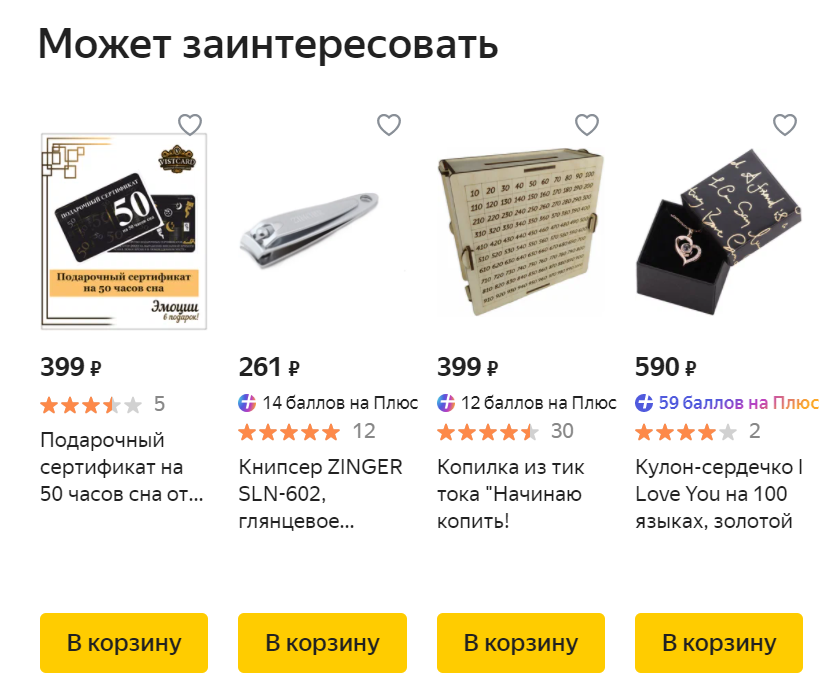

# 2. Постановка задачи

> *U* - множество пользователей (users)

> *I* - множество объектов (контент, items)

> *R* - матрица взаимодействия пользователей и объектов (оценки, rating), её ещё называют explicit feedback

> Задача: определить функционал *f*, который наиболее точно прогнозирует матрицу *R* взаимодействия пользователей *U* с объектами *I*

>***f(U, I) = R'≈ R***

То есть, рекомендательная система, к примеру онлайн кинотеатра, оперирует примерно следующей таблицей:

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(4)
films_rating = pd.DataFrame(
    np.random.randint(0, 6, (6, 7)),
    index=['user_1', 'user_2', 'user_3', 'user_4', 'user_5', 'user_6'],
    columns=['Мстители', 'Матрица', 'Девчата', 
             'Начало', 'Пираты карибского моря', 'Звёздные войны', '1+1']).replace(0, np.nan)
films_rating

,Мстители,Матрица,Девчата,Начало,Пираты карибского моря,Звёздные войны,1+1
user_1,2,5.0,1.0,NaN,NaN,2.0,1
user_2,2,4.0,5.0,1.0,NaN,4.0,2
user_3,4,2.0,4.0,3.0,NaN,5.0,5
user_4,1,5.0,NaN,2.0,5.0,NaN,1
user_5,2,2.0,NaN,NaN,3.0,2.0,5
user_6,1,NaN,5.0,4.0,3.0,2.0,3


> Пустые ячейки (NaN) означают, что пользователь ещё не посмотрел фильм, тогда цель состоит в прогнозировании отсутствующих значений.

Рассмотрим способы решения этой задачи.

# 3. Кластерные рекомендации

> Давайте сделаем предположение, что пользователей можно разделить на группы по интересам (кластеры), опираясь на их оценки. То есть будем относить пользователей в один кластер, если их оценки очень близки.

> Как это сделать? Нам нужна какая нибудь математическая формула, которая опишет на сколько похожи пользователи. Так как в матрице оценок каждый пользователь описан по сути некоторым вектором, в качестве функции схожести можно использовать расстояние между векторами, их ещё называют метриками. Одни из самых популярных - евклидова и косинусная метрики.

Евклидова метрика:

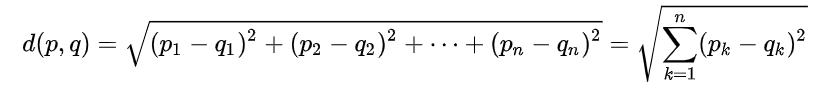

Косинусная метрика:

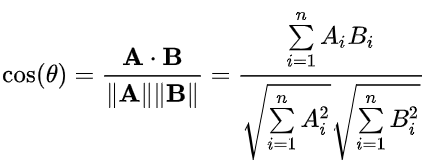



> В качестве прогнозируемой оценки будем брать среднюю по классу и записывать её на место пропуска.



Давайте разделим пользователей онлайн кинотеатра на 2 кластера относительно user_1.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

distances = pd.DataFrame(
    euclidean_distances(films_rating.fillna(0).values),
    index=['user_1', 'user_2', 'user_3', 'user_4', 'user_5', 'user_6'],
    columns=['user_1', 'user_2', 'user_3', 'user_4', 'user_5', 'user_6'])
distances

,user_1,user_2,user_3,user_4,user_5,user_6
user_1,0.000000,4.795832,7.483315,5.916080,5.916080,8.426150
user_2,4.795832,0.000000,4.795832,8.366600,7.211103,6.324555
user_3,7.483315,4.795832,0.000000,10.049876,6.855655,6.082763
user_4,5.916080,8.366600,10.049876,0.000000,6.164414,8.124038
user_5,5.916080,7.211103,6.855655,6.164414,0.000000,7.071068
user_6,8.426150,6.324555,6.082763,8.124038,7.071068,0.000000


In [ ]:
cluster_1, cluster_2 = distances.sort_values('user_1').iloc[:distances.shape[0] // 2, :], distances.sort_values('user_1').iloc[distances.shape[0] // 2:, :]
cluster_1

,user_1,user_2,user_3,user_4,user_5,user_6
user_1,0.000000,4.795832,7.483315,5.91608,5.916080,8.426150
user_2,4.795832,0.000000,4.795832,8.36660,7.211103,6.324555
user_4,5.916080,8.366600,10.049876,0.00000,6.164414,8.124038


In [ ]:
cluster_2

,user_1,user_2,user_3,user_4,user_5,user_6
user_5,5.916080,7.211103,6.855655,6.164414,0.000000,7.071068
user_3,7.483315,4.795832,0.000000,10.049876,6.855655,6.082763
user_6,8.426150,6.324555,6.082763,8.124038,7.071068,0.000000


In [ ]:
films_cluster_1 = films_rating.T[list(cluster_1.index)].T
films_cluster_1

,Мстители,Матрица,Девчата,Начало,Пираты карибского моря,Звёздные войны,1+1
user_1,2.0,5.0,1.0,NaN,NaN,2.0,1.0
user_2,2.0,4.0,5.0,1.0,NaN,4.0,2.0
user_4,1.0,5.0,NaN,2.0,5.0,NaN,1.0


In [ ]:
films_cluster_2 = films_rating.T[list(cluster_2.index)].T
films_cluster_2

,Мстители,Матрица,Девчата,Начало,Пираты карибского моря,Звёздные войны,1+1
user_5,2.0,2.0,NaN,NaN,3.0,2.0,5.0
user_3,4.0,2.0,4.0,3.0,NaN,5.0,5.0
user_6,1.0,NaN,5.0,4.0,3.0,2.0,3.0


В жизни деление на кластеры происходит несколько сложнее, но мы для наглядности будем рассуждать так.

Теперь берём кластер №1, так как user_1 находится в нём и вычисляем средние оценки.

In [ ]:
mean_rating = films_cluster_1.drop('user_1').mean(skipna=False)
films_cluster_1_T = films_cluster_1.T
films_cluster_1_T['mean_rating'] = mean_rating
films_cluster_1_T.T

,Мстители,Матрица,Девчата,Начало,Пираты карибского моря,Звёздные войны,1+1
user_1,2.0,5.0,1.0,NaN,NaN,2.0,1.0
user_2,2.0,4.0,5.0,1.0,NaN,4.0,2.0
user_4,1.0,5.0,NaN,2.0,5.0,NaN,1.0
mean_rating,1.5,4.5,NaN,1.5,NaN,NaN,1.5


> И тут мы сталкиваемся с основной проблемой всех рекомендательных систем - проблема "холодного старта". Если в кластере ещё никто из пользователей не оценил фильм или пользователей слишком мало, то не понятно как прогнозировать оценку.

> Помио этого, даннный метод не учитывает персональные предподчения, а учитывает только интересы группы (кластера)

> Также не понятно что делать с новым пользователем, который ещё ничего не оценил и меру схожести для них посчитать не возможно

# Задание 1

Представьте, что мы решили попробовать реализовать рекомендательную систему на основе кластерного метода, ведь он довольно простой, поэтому в качестве MVP (Minimum Viable Product) может подойти.
> Требуется на основе имеющихся данных о просмотренных фильмах сделать рекомендации пользователю, для этого напишите функцию, моделирующую принцип работы кластерных рекомендаций, сделайте прогноз оценки пользователя `user_4` для фильма "Звёздные войны", используя евклидову и косинусную метрики. Попадёт ли этот фильм в рекомендацию если принять, что туда попадают фильмы с прогнозом оценки выше 3-х?

> Будем считать, что кластера всегда два, а фильм включается в рекомендацию если прогноз оценки выше 3-х. 

> На вход функция принимает данные оценок в виде датафрейма(`films_rating`), имя пользователя(`user_id`) в виде строки и название формулы для рассчёта меры схожести (`cos` или `euclid`). На выходе  датафрейм с прогнозом оценок. Если прогноз сделать невозможно, функция должна вывести сообщение об этом.

> Input:

*   `films_rating`: `pandas.dataframe`
*   `user_id`: `str`
*   `calculating_method`: `str`

> Output:

* `predict_rating`: `pandas.dataframe`

In [ ]:
# Код выполнения задания 1

def cluster_rec_sys(films_rating: pd.DataFrame, 
                    user_id: str, 
                    calculating_method: str) -> pd.core.frame.DataFrame:
    """
    Функция моделирующая рекомендательную систему на базе кластерного метода.
    """

# 4. Пользователь-ориентированные (user-based) и контент-ориентированные (item-based) системы

> Как и в кластерном методе, в поднобных системах используется понятие схожести.

> Однако в случае user-based подхода в качестве прогноза берётся средняя оценка пользователя по фильмам, которые он оценил, и корректируется в соответствии с оценками похожих пользователей, которые уже сделали оценку самостоятельно.

> В item based происходит тоже самое, но вместо пользователей берутся объекты (элементы контента)

> Схема работы примерно следующая: пользователь заходит на страницу онлайн-кинотетатра и видит раздел "Рекомендуем посмотреть" - здесь работает user based.
Когда пользователь закончил просомотр какого-нибудь фильма, ему предлагается оценить фильм. После оценки он видит раздел "Похожие фильмы" - это результат работы item based.

Математически это выглядит следующим образом:


*   user-based

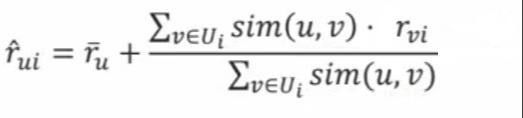



*   item-based


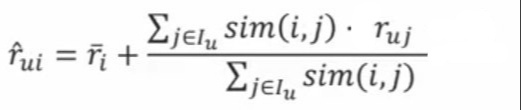

Рассмотрим пример.

Вернёмся к нашему онлайн-кинотеатру. Допустим, кластерный подход нас не удовлетворил и мы решили попробовать user-based метод.

> Шаг 1. Рассчитать меру схожести пользователей исходя из имеющихся оценок.

Воспользуемся косинусной мерой.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

users_sim = cosine_similarity(films_rating.fillna(0))
users_sim_df = pd.DataFrame(
    users_sim,
    columns=['user_1', 'user_2', 'user_3', 'user_4', 'user_5', 'user_6'],
    index=['user_1', 'user_2', 'user_3', 'user_4', 'user_5', 'user_6'])
users_sim_df

,user_1,user_2,user_3,user_4,user_5,user_6
user_1,1.000000,0.811444,0.641661,0.632456,0.573212,0.295804
user_2,0.811444,1.000000,0.871396,0.427669,0.544466,0.692390
user_3,0.641661,0.871396,1.000000,0.342755,0.710980,0.782308
user_4,0.632456,0.427669,0.342755,1.000000,0.630488,0.451003
user_5,0.573212,0.544466,0.710980,0.630488,1.000000,0.552907
user_6,0.295804,0.692390,0.782308,0.451003,0.552907,1.000000


> Шаг 2. Рассчитать суммарную меру для каждого пользователя, не забыв вычесть расстояние до самого себя, то есть 1 в случае косинусного расстояния.

In [ ]:
users_sim_df['sum_cos_dist'] = np.sum(users_sim, axis=1) - 1
users_sim_df

,user_1,user_2,user_3,user_4,user_5,user_6,sum_cos_dist
user_1,1.000000,0.811444,0.641661,0.632456,0.573212,0.295804,2.954577
user_2,0.811444,1.000000,0.871396,0.427669,0.544466,0.692390,3.347363
user_3,0.641661,0.871396,1.000000,0.342755,0.710980,0.782308,3.349100
user_4,0.632456,0.427669,0.342755,1.000000,0.630488,0.451003,2.484371
user_5,0.573212,0.544466,0.710980,0.630488,1.000000,0.552907,3.012052
user_6,0.295804,0.692390,0.782308,0.451003,0.552907,1.000000,2.774413


> Шаг 3. Умножить оценки пользователей на соответсвующие им косинусную меру, относительно пользователя, для которого делается рекомендация.

Таким образом, оценки более «похожих» пользователей будут сильнее влиять на итоговую позицию фильма

Нам нужны фильмы, которые ещё не оценил выбранный пользователь.

Для user_1:

In [ ]:
reformed_scores_user_1 = films_rating[['Девчата', 'Начало']].fillna(0).T * users_sim_df.iloc[0, :-1]
reformed_scores_user_1.T  

,Девчата,Начало
user_1,1.000000,0.000000
user_2,4.057221,0.811444
user_3,2.566646,1.924984
user_4,0.000000,1.264911
user_5,0.000000,0.000000
user_6,1.479020,1.183216


> Шаг 4. Для каждого фильма рассчитать сумму оценок полученных на предыдущем шаге.

Для user_1:

In [ ]:
reformed_scores_user_1['sum_score'] = reformed_scores_user_1.sum(axis=1)
reformed_scores_user_1.T.drop('user_1')

,Девчата,Начало
user_2,4.057221,0.811444
user_3,2.566646,1.924984
user_4,0.000000,1.264911
user_5,0.000000,0.000000
user_6,1.479020,1.183216
sum_score,9.102886,5.184555


> Шаг 5. Сумму, полученную на предыдущем шаге разделить на сумму мер, полученную на Шаге 2.

Для user_1:

In [ ]:
recomendation_user_1 = reformed_scores_user_1.copy()
recomendation_user_1['result'] = reformed_scores_user_1['sum_score'] / users_sim_df.sum_cos_dist[0]
recomendation_user_1.T.drop('user_1')

,Девчата,Начало
user_2,4.057221,0.811444
user_3,2.566646,1.924984
user_4,0.000000,1.264911
user_5,0.000000,0.000000
user_6,1.479020,1.183216
sum_score,9.102886,5.184555
result,3.080944,1.754754


> Шаг 6. Сделать рекомендацию на основе результатов вычислений.

В строке result находится ничто иное как прогноз оценки пользователя на фильм, которые он ещё не посмотрел. На их основе, можно сделать его персональную рекомендацию, взяв фильмы с наивысшей прогнозируемой оценкой.

Для user_1:

In [ ]:
top_films = recomendation_user_1.result.sort_values(ascending=False)
top_films

Девчата    3.080944
Начало     1.754754
Name: result, dtype: float64

In [ ]:
print('Рекомендуем Вам фильм', top_films.index[0])

Рекомендуем Вам фильм Девчата


В силу искусственной природы данных, результаты отличатся от реальных.

Это самый простой пример реализации. Существуют другие подходы и другие виды математических моделей.

Однако, у описанных подходов всё ещё присутствуют проблема холодного старта:

*   Что рекомендовать новым пользователям?
*   Кому рекомендовать новые товары?



# Задание 2.

> Как уже упоминалось, рекомендательные системы также используются в сервисах типа онлайн магазин.

> К Вам обратилась компания, владеющая интернет-магазином, с задачей разработать рекомендательную систему на основе оценок, которые поставили пользователи.

> Требуется сделать рекомендацию конкретному пользователю, для этого напишите функцию, моделирующую принцип работы user based рекомендательной системы и сделать рекомендацию для пользователя `user_0`, используя косинусную метрику.

> На вход она должна принимать данные в виде массива с оценками пользователей (`products_ratings`), индекс пользователя (`user_id`), для которого необходимо сделать рекомендацию, и `calculating_method` - способ рассчёта схожести. На выходе названия 3-х рекомендуемых товаров, которые наиболее вероятно понравятся пользователю.

> Input:

*   `products_ratings`: `pandas.dataframe`
*   `user_id`: `str`
*   `calculating_method`: `str`

> Output:

* `predict_rating`: `pandas.dataframe`

Используйте следующие данные:

In [ ]:
np.random.seed(4)
data = np.random.randint(0, 5, (10, 15))
products_ratings = pd.DataFrame(data, 
                       columns=['Смартфон', 'Ноутбук', 'Наушники', 'Компьютерная мышь', 'Веб-камера', 
                                'Чехол для смартфона', 'Чехол для ноутбука', 'Портативная зарядка', 
                                'Флеш накопитель', 'Защитное стекло', 'Защитная плёнка', 'Зарядное устройство', 
                                'Монитор', 'Аудио система', 'Умная колонка'],
                       index=[f'user_{i}' for i in range(10)]).replace(0, np.nan)
products_ratings

,Смартфон,Ноутбук,Наушники,Компьютерная мышь,Веб-камера,Чехол для смартфона,Чехол для ноутбука,Портативная зарядка,Флеш накопитель,Защитное стекло,Защитная плёнка,Зарядное устройство,Монитор,Аудио система,Умная колонка
user_0,2.0,1.0,NaN,NaN,2.0,1.0,2,4.0,1.0,NaN,4.0,2.0,4.0,2.0,4.0
user_1,3.0,NaN,1.0,NaN,2.0,NaN,1,2.0,2.0,NaN,NaN,3.0,2.0,1.0,NaN
user_2,4.0,3.0,2.0,3.0,2.0,1.0,2,1.0,NaN,1.0,1.0,1.0,3.0,NaN,4.0
user_3,2.0,3.0,3.0,NaN,2.0,2.0,1,2.0,3.0,NaN,4.0,3.0,3.0,3.0,3.0
user_4,NaN,1.0,NaN,3.0,2.0,NaN,4,3.0,NaN,4.0,NaN,1.0,1.0,4.0,2.0
user_5,3.0,3.0,4.0,NaN,4.0,NaN,3,3.0,4.0,2.0,1.0,3.0,1.0,4.0,3.0
user_6,NaN,2.0,NaN,NaN,3.0,4.0,4,NaN,2.0,1.0,2.0,NaN,NaN,1.0,4.0
user_7,3.0,1.0,3.0,2.0,4.0,NaN,3,2.0,1.0,1.0,3.0,2.0,2.0,1.0,4.0
user_8,4.0,3.0,3.0,NaN,NaN,1.0,1,2.0,NaN,2.0,4.0,2.0,3.0,NaN,3.0
user_9,4.0,1.0,4.0,NaN,3.0,4.0,4,3.0,4.0,NaN,2.0,3.0,3.0,3.0,1.0


In [ ]:
# Код выполнения задания 2

def user_based_rec_sys(products_ratings: pd.DataFrame,
                       calculating_method: str,
                       user_id: str) -> pd.core.frame.DataFrame:
    """
    Функция реализующая рекомендательную систему на базе пользователь
    ориентированного подхода.
    """


# 5. Матричное разложение в рекомендательных системах

> Описанные выше подходы обладают ещё одним серьёзным недостатком - они очень ресурсоёмкие. И это не удиивительно, ведь если сервисом пользуются миллионы людей и в нём содержится миллионы объектов котнтента, то матрица оценок становится гиганской. Её сложно хранить, обрабатывать и обновлять. При этом она крайне разрежена, то есть большинсво ячеек пусты. С этим что то нужно делать.

> К счастью, у математики есть решение, которое называется сингулярное разложение матрицы (SVD - Singular Value Decomposition). 

> Суть алгоритма сводится к преобразованию матрицы трёх матриц, которые можно свести в произведения двух матриц меньшего размера, с помощью которых, с небольшой погрешностью, но можно восстановить исходную матрицу:

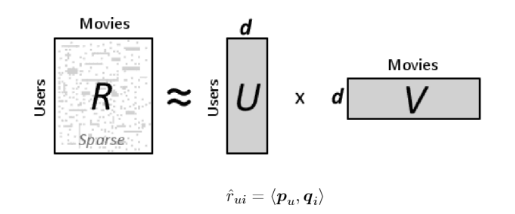

Это как раз то что нам нужно. С помощью данного метода можно разложить матрицу оценок.

Посмотрим как это выглядит в коде.

In [ ]:
films_rating

,Мстители,Матрица,Девчата,Начало,Пираты карибского моря,Звёздные войны,1+1
user_1,2,5.0,1.0,NaN,NaN,2.0,1
user_2,2,4.0,5.0,1.0,NaN,4.0,2
user_3,4,2.0,4.0,3.0,NaN,5.0,5
user_4,1,5.0,NaN,2.0,5.0,NaN,1
user_5,2,2.0,NaN,NaN,3.0,2.0,5
user_6,1,NaN,5.0,4.0,3.0,2.0,3


In [ ]:
import tensorflow as tf

U, s, V = np.linalg.svd(
    tf.convert_to_tensor(films_rating.replace('', np.nan).values, np.int32), 
    full_matrices=False,
    compute_uv=True)

Латентное пространство пользователей:

In [ ]:
u_df = pd.DataFrame(U @ np.diag(s), 
                    index=[
                           'user_1', 'user_2', 'user_3', 
                           'user_4', 'user_5', 'user_6'],
                    columns=['', '', '', '', '', ''])
u_df

,,,,,,
user_1,2.751910e+09,9.663421e+08,6.456892e+08,-9.999996e-01,5.473888e+08,3.357931e-09
user_2,1.489323e+09,1.262587e+09,-8.436335e+08,6.000000e+00,-2.962447e+08,-1.802776e+00
user_3,1.489323e+09,1.262587e+09,-8.436335e+08,8.000001e+00,-2.962447e+08,1.802776e+00
user_4,1.139878e+09,-2.332956e+09,-1.558832e+09,1.300000e+01,2.267359e+08,8.394833e-10
user_5,2.106220e+09,-1.785567e+09,1.193078e+09,-1.000002e+00,-4.189533e+08,-1.678965e-09
user_6,-1.434740e+01,5.510165e+00,1.579265e+01,2.147484e+09,6.185350e-01,-1.678966e-09


Латентное пространство фильмов:

In [ ]:
v_df = pd.DataFrame(V, 
                    columns=[
                             'Мстители', 'Матрица', 'Девчата', 'Начало', 
                             'Пираты карибского моря', 'Звёздные войны', '1+1'],
                    index=['', '', '', '', '', ''])
v_df

,Мстители,Матрица,Девчата,Начало,Пираты карибского моря,Звёздные войны,1+1
,1.115382e-09,3.573928e-09,-3.928475e-01,-5.879378e-01,-6.935199e-01,-1.379497e-01,1.400317e-09
,2.826090e-10,-1.149664e-09,6.935199e-01,1.379497e-01,-5.879378e-01,3.928475e-01,-1.141961e-10
,-5.169007e-10,-7.228256e-09,1.379497e-01,-6.935199e-01,3.928475e-01,5.879378e-01,-1.498465e-10
,4.656613e-10,-1.000000e+00,-3.259628e-09,2.793968e-09,-4.656613e-09,-5.122276e-09,1.396984e-09
,-1.842877e-09,-1.040398e-10,5.879378e-01,-3.928475e-01,1.379497e-01,-6.935199e-01,-4.834661e-09
,5.547002e-01,1.420663e-09,3.680809e-09,-1.226936e-09,2.130995e-09,-3.035053e-09,8.320503e-01


> Здорово правда? Получаем намного более компактные таблицы. И что самое приятное мы не безповоротно таблицу оценок, её можно восстановить согласное формуле приведённой выше: чтобы получить оценку выставленную пользователем конкретному фильму, необходимо скалярно перемножить вектор интересующего пользователя и вектор фильма.

Скалярно перемножим латентную матрицу пользователей и фильмов.

In [ ]:
restored_ratings = pd.DataFrame(np.dot(u_df, v_df), 
             columns=[
                      'Мстители', 'Матрица', 'Девчата', 'Начало', 
                      'Пираты карибского моря', 'Звёздные войны', '1+1'],
             index=[
                    'user_1', 'user_2', 'user_3', 
                    'user_4', 'user_5', 'user_6'])
restored_ratings[films_rating != ''].round(2)

,Мстители,Матрица,Девчата,Начало,Пираты карибского моря,Звёздные войны,1+1
user_1,2.0,5.000000e+00,1.000000e+00,-2.147484e+09,-2.147484e+09,2.000000e+00,1.0
user_2,2.0,4.000000e+00,5.000000e+00,1.000000e+00,-2.147484e+09,4.000000e+00,2.0
user_3,4.0,2.000000e+00,4.000000e+00,3.000000e+00,-2.147484e+09,5.000000e+00,5.0
user_4,1.0,5.000000e+00,-2.147484e+09,2.000000e+00,5.000000e+00,-2.147484e+09,1.0
user_5,2.0,2.000000e+00,-2.147484e+09,-2.147484e+09,3.000000e+00,2.000000e+00,5.0
user_6,1.0,-2.147484e+09,5.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00,3.0


> Как можно заметить, восстановленные значения немного отличаются от исходных.

> Справедливо можно задать вопрос: а что это за вектора такие (их ещё иногда называют латентными)? В этом и заключается "магия", так как метод SVD, по сути, автоматически генерирует признаки для пользователей и объектов (фильмы, товары, в общем контент). Таким образом, каждое число в полученных векторах, кодирует некоторый признак. Например, если положить что первый элемент отвечает за пол пользователя и отрицательные значения соответсуют пользователям-мужчинам, то при перемножении соответствующих элементов вектора пользователя-мужчины и вектора фильма, который чаще предпочитают мужчины, значение на выходе будет положителем, что внесёт положительный вклад в итоговое значение прогноза, а значит увеличится вероятность попадания в рекомендацию.

> Также вскрывается проблема пропущенных значений - восстановить их до сих пор не получается, но мы уже близки к решению.

> Как можно использовать латентные вектора, чтобы наилучшим образом прогнозировать оценку? Напомним, восстановленная оценка - это скалярное произведение вектора пользователя и вектора объекта (фильма). А что если использовать эти вектора как параметры модели, обернуть их в некоторый функционал и начать минимазировать. Так это же классичекая задача машинного обучения, которую можно решить с помощью градиентного спуска.

Если в качестве функционала (функции потерь) взять средний квадрат ошибки, математически это можно описать так:

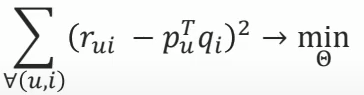

> Рассмотрим пример

Для начала нам необходимо преобразовать данные: создать связь каждый с каждым.

In [ ]:
# сборос индексов
u_df_latent = u_df.reset_index()
v_df_latent = v_df.T.reset_index()

# новые индексы
indexes = []
for i in range(v_df_latent.shape[0]):
    for j in range(u_df_latent.shape[0]):
       indexes.append(j)

duplic_films = pd.concat([v_df_latent for i in range(u_df_latent.shape[0])])
duplic_films.index = sorted(indexes)

# связь каждый с каждым
merged_latent_data = u_df_latent.merge(duplic_films, 
                                       left_index=True, 
                                       right_index=True)
stacked_films_rating = films_rating.stack(dropna=False).reset_index()
stacked_films_rating.columns = ['user_id', 'movie_name', 'rating']
stacked_films_rating.index = sorted(indexes)
data_for_sgd = merged_latent_data.copy()
data_for_sgd = pd.concat([data_for_sgd, stacked_films_rating[['rating']]], axis=1)
                                      
# данные без оценки отложим в сторону
miss_data = data_for_sgd[data_for_sgd.rating.isna()]
full_data = data_for_sgd.dropna()

Выделим целевой (оценки) и нецелевые признаки (латентное пространство)

In [ ]:
X = full_data.drop(columns=['index_x', 'index_y', 'rating'])
y = full_data.rating

Вот такие данные получились из латентных векторов.

In [ ]:
X.head(10)

,_x,_x,_x,_x,_x,_x,_y,_y,_y,_y,_y,_y
0,2.751910e+09,9.663421e+08,6.456892e+08,-1.0,5.473888e+08,3.357931e-09,1.115382e-09,2.826090e-10,-5.169007e-10,4.656613e-10,-1.842877e-09,5.547002e-01
0,2.751910e+09,9.663421e+08,6.456892e+08,-1.0,5.473888e+08,3.357931e-09,3.573928e-09,-1.149664e-09,-7.228256e-09,-1.000000e+00,-1.040398e-10,1.420663e-09
0,2.751910e+09,9.663421e+08,6.456892e+08,-1.0,5.473888e+08,3.357931e-09,-3.928475e-01,6.935199e-01,1.379497e-01,-3.259628e-09,5.879378e-01,3.680809e-09
0,2.751910e+09,9.663421e+08,6.456892e+08,-1.0,5.473888e+08,3.357931e-09,-1.379497e-01,3.928475e-01,5.879378e-01,-5.122276e-09,-6.935199e-01,-3.035053e-09
0,2.751910e+09,9.663421e+08,6.456892e+08,-1.0,5.473888e+08,3.357931e-09,1.400317e-09,-1.141961e-10,-1.498465e-10,1.396984e-09,-4.834661e-09,8.320503e-01
1,1.489323e+09,1.262587e+09,-8.436335e+08,6.0,-2.962447e+08,-1.802776e+00,1.115382e-09,2.826090e-10,-5.169007e-10,4.656613e-10,-1.842877e-09,5.547002e-01
1,1.489323e+09,1.262587e+09,-8.436335e+08,6.0,-2.962447e+08,-1.802776e+00,3.573928e-09,-1.149664e-09,-7.228256e-09,-1.000000e+00,-1.040398e-10,1.420663e-09
1,1.489323e+09,1.262587e+09,-8.436335e+08,6.0,-2.962447e+08,-1.802776e+00,-3.928475e-01,6.935199e-01,1.379497e-01,-3.259628e-09,5.879378e-01,3.680809e-09
1,1.489323e+09,1.262587e+09,-8.436335e+08,6.0,-2.962447e+08,-1.802776e+00,-5.879378e-01,1.379497e-01,-6.935199e-01,2.793968e-09,-3.928475e-01,-1.226936e-09
1,1.489323e+09,1.262587e+09,-8.436335e+08,6.0,-2.962447e+08,-1.802776e+00,-1.379497e-01,3.928475e-01,5.879378e-01,-5.122276e-09,-6.935199e-01,-3.035053e-09


Значения латентных слишком растянуты на числовой прямой, это негативно скажется на процессе градиентного спуска, поэтому приведём их к единой шкале (этот процесс ещё называют стандартизацией)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit(X).transform(X)

Согласно принципу отложенной выборки, разделим данные на тестовую и тренировочную подвыборки

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

reg = SGDRegressor(loss='squared_error', penalty='elasticnet', 
                   alpha=0.001, max_iter=2)

reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDRegressor(alpha=0.001, max_iter=2, penalty='elasticnet')

Посмотрим на среднеквадратическую ошибку (MSE)

In [ ]:
# пересчитай baseline как среднюю оценку

from sklearn.metrics import mean_squared_error

mean_squared_error(reg.predict(X_test), y_test)

2.264188648009976

Теперь можно сделать прогноз оценок

In [ ]:
X_miss_data = miss_data.drop(columns=['index_x', 'index_y', 'rating'])
X_scaled_miss_data = scaler.fit(X_miss_data).transform(X_miss_data)

reg.predict(X_scaled_miss_data)

array([2.01233213, 2.21283884, 1.76765179, 2.0068409 , 2.02622808,
       1.81197643, 2.24346946, 1.611383  , 1.82443245])

# 5. Implicit Feedback

> Все выше изложенные рассуждения опирались на оценки пользователей (это называется explicit feedback - явная обратная связь), но в большинстве случаев такая информация отсутствует. Пользователей довольно сложно заставить оценить объекты контента, это легко проследить например с помощью YouTube. Даже самые просматриваемые ролики набирают около 1-5% оценок (лайков, дизлайков) от количества просмотров. Или вспомните себя, часто ли вы оставляете отзывы на товары, которые приобретаете или ставите оценки фильму? Если да, то это очень здорово, рекомендаельной системе становится сильно проще с вами работать. Но в большинстве случаев, мы действительно не склонны ставить оценки.

> В таких случаях на помощь приходит implicit feedback - неявная обратная связь, представляющая собой информацию о фактах взаимодействия пользователя и контента. Таблице оценок, в данном случае, выглядит как набор нулей и единиц. Причём единица не означает, что объект нравится пользователю, это говорит нам лишь о том, что пользовтель взаимодействовал с ним. И наоборот, ноль не означает, что элемент контента не по душе пользователю. Приемущество такого представлени данных в том, что пропусков по сути нет, они просто преобразуются в ноль, а это упрощает процесс обработки.

Таблицу оценок довольно просто преобразовать в таблицу взаимодействий.

In [ ]:
bool_films_rating = films_rating.fillna(0) != 0
implicit_films_rating = bool_films_rating.astype(int)
implicit_films_rating

,Мстители,Матрица,Девчата,Начало,Пираты карибского моря,Звёздные войны,1+1
user_1,1,1,1,0,0,1,1
user_2,1,1,1,1,0,1,1
user_3,1,1,1,1,0,1,1
user_4,1,1,0,1,1,0,1
user_5,1,1,0,0,1,1,1
user_6,1,0,1,1,1,1,1


Хорошая новость в том, что матрицу взаимодействий тоже можно подвергнуть сингулярному разложению и полученные латентные матрицы, будут нести примерно тот же смысл, что и в случае матрицы оценок.

> Пример

> Давайте создадим свой класс который будет реализовывать выше описанные положения. Сделаем это на основе пакета implicit (пакет "тяжёлый", поэтому устанавливается довольно долго).

In [ ]:
!pip install implicit

     |████████████████████████████████| 18.5 MB 1.5 MB/s 


> В данный пакет встроен набор данных MovieLens, с ним мы и будем работать.

In [ ]:
import os
import numpy as np
import pandas as pd
import implicit

os.environ['OPENBLAS_NUM_THREADS'] = '1'

/usr/local/lib/python3.7/dist-packages/implicit/gpu/__init__.py:14: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  f"CUDA extension is built, but disabling GPU support because of '{e}'",


In [ ]:
from implicit.datasets.movielens import get_movielens

titles, ratings = get_movielens('1m')

0.00B [00:00, ?B/s]

> Посмотрим, что внутри

In [ ]:
for title in titles[:10]:
    print(title)


Toy Story (1995)
Jumanji (1995)
Grumpier Old Men (1995)
Waiting to Exhale (1995)
Father of the Bride Part II (1995)
Heat (1995)
Sabrina (1995)
Tom and Huck (1995)
Sudden Death (1995)


> Всё ясно, это таблица оценок, то есть explicit feedback. Оценки от 1 до 5.

In [ ]:
np.unique(ratings.toarray())

array([0., 1., 2., 3., 4., 5.], dtype=float32)

> Разделим данные на тестовую и тренировочную выборку

In [ ]:
from implicit.evaluation import train_test_split

train_explicit_ratings, test_explicit_ratings = train_test_split(ratings, 0.9)

> Преобразуем таблицу оценок в таблицу взаимодействий (explicit -> implicit)

In [ ]:
train_ratings = train_explicit_ratings.copy()
test_ratings = test_explicit_ratings.copy()

train_ratings.data = np.ones_like(train_ratings.data)
test_ratings.data = np.ones_like(test_ratings.data)

In [ ]:
from implicit.recommender_base import RecommenderBase
from scipy.sparse.linalg import svds
from operator import itemgetter
import scipy
import numpy

ig0, ig1 = itemgetter(0), itemgetter(1)

class SparseSVD(RecommenderBase):
    """
    Класс для проведения сингулярного разложения матрицы взаимодействий
    и создание рекомендаций на базе латентного представления.
    """
    def __init__(self, factors=32) -> None:
        self.factors = factors

    def fit(self, item_users: scipy.sparse.csr.csr_matrix):
        """
        Метод обучения модели.
        """
        sparse_user_item = item_users.T.tocsr()
        self.U, self.s, self.V = svds(sparse_user_item, k=self.factors)

        self.s_V = np.diag(self.s) @ self.V

    def _get_all_predictions(self, user_id: int) -> numpy.ndarray:
        """
        Метод проведения прогноза для одного пользователя.
        """
        preds = self.U[user_id] @ self.s_V
        return preds

    def rank_items(self, user_id: int, user_items: scipy.sparse.csr.csr_matrix, selected_items):
        """
        Метод ранжирования прогнозов.
        """
        selected_items = list(selected_items)
        preds = self._get_all_predictions(user_id)
        items_preds = zip(selected_items, preds[selected_items])
        ranked_items = sorted(items_preds, key=ig1, reverse=True)
        return ranked_items

    def recommend(self, user_id: int, user_items: int, N=10, 
                  filter_already_liked_items: bool =True, filter_items=None):
        """
        Метод проведения рекомендаций, с возможностью исключения из прогноза 
        объектов, с которыми уже было взаимодействие.
        """
        n_items = self.V.shape[1]
        selected_items = set(range(n_items))
        
        if filter_already_liked_items:
            already_liked_items = set(user_items[user_id].tocoo().col)
            selected_items = selected_items - already_liked_items

        if filter_items is not None:
            selected_items = selected_items - set(filter_items)

        ranked_items = self.rank_items(user_id, user_items, selected_items)
        top_n_items = ranked_items[:N]

        return top_n_items


> Обучим модель - проведём сингулярное разложение матрицы тренировочных данных

In [ ]:
sparse_svd = SparseSVD(factors=32)
sparse_svd.fit(train_ratings)

In [ ]:
sparse_svd.rank_items(1, test_ratings, [1, 2])

[(1, 0.6467495), (2, 0.051710866)]

> Сделаем рекомендацию для пользователя с номером 10

In [ ]:
predictions = sparse_svd.recommend(10, test_ratings)
for pred in predictions:
    print(titles[pred[0]])

Star Wars: Episode IV - A New Hope (1977)
Back to the Future (1985)
Star Wars: Episode V - The Empire Strikes Back (1980)
Wizard of Oz, The (1939)
Willy Wonka and the Chocolate Factory (1971)
Princess Bride, The (1987)
E.T. the Extra-Terrestrial (1982)
Star Wars: Episode VI - Return of the Jedi (1983)
Monty Python and the Holy Grail (1974)
Star Wars: Episode I - The Phantom Menace (1999)


# 6. Метрики качества

 > Теперь нужно оценить её эфективность, во-первых, чтобы понимать самим насколько качественное наше решение, во-вторых, чтобы доходчиво объяснить заказчику почему наша система готова к применению и мы молодцы.

 > Одна из самых простых метрик (она же популярная функция потерь для задач регрессии - прогноз непрерывной велечины) **RMSE** (root mean squared_error). Мы её уже использовали когда проводили стахостический градиентный спуск в 5-ом пункте

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


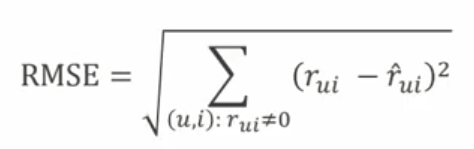

> RMSE удобная и понятная метрика, но у неё есть ряд недостатков:

*   Не учитываются персональные привычки оцнивания пользователей (например, для пользователя №1 хороший фильм заслуживает оценку 5, средний 4, а совсем плохой только 3, в то время как пользователь №2 может вовсе не ставить ниже 4. Тогда №1 будет вносить больший вклад в значение мерики, так как его диапазон выше)
*   Ошибка в прогнозе высоких оценок имеет тот же вес, что и ошибка в предсказании низких оценок (представьте, что истинная оценка 4, а прогноз 5, ничего страшного скорее всего не произойдёт, пользователь увидет это в рекомендациях. А вот если истинная оценка 4, а прогноз 2, то пользовталь не увидит этот объект, хотя он ему понравится, этот случай должен иметь больший вес)
*   RMSE работает только в случае явных оценок (explicit feedback)

> Более гибкими являются метрики ранжирования, рассмотрим некоторые из них:


*   Precision
*   Recall
*   Mean Average Precision (MAP)

> Precision и Recall, как правило, используются совместно и определяются схожим образом:

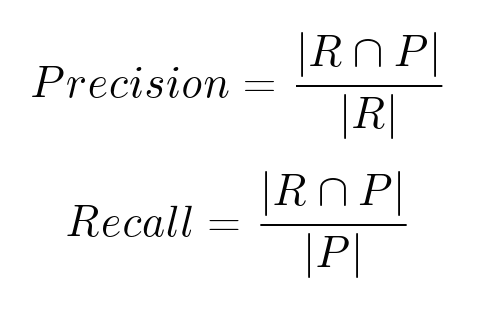

где R - множество рекомендованных объектов, P - множество объектов интересных пользователю.

> В обоих случаях необходимо найти мощность пересечения (то есть просто количество объектов) множества объектов, которые были рекомендованы пользователю, и множества объектов действительно интересных пользователю, а затем поделить на мощность множества рекомендованных объектов для Precision, на мощность множества действительно интересных пользователю.

> Вы наверняка сталкивались с этими метриками, но в терминах бинарной классификации. Так вот, принципиально ни чего не изменилось: если принять что метка 0 соответсвует объекту, который не интересен пользователю, а 1 - объект интересен пользователю, то задача принимает привычный вид, с понятиями True Positive, True Negative и т.д.

Пример

Воспользуемся знакомым онлайн кинотеатром

In [ ]:
stacked_films_rating = pd.DataFrame(films_rating.stack()).reset_index()
full_stacked_films_rating = stacked_films_rating[stacked_films_rating[0] != '']
full_stacked_films_rating.columns = ['user_id', 'movie_name', 'rating']
full_stacked_films_rating.head(10)

,user_id,movie_name,rating
0,user_1,Мстители,2.0
1,user_1,Матрица,5.0
2,user_1,Девчата,1.0
3,user_1,Звёздные войны,2.0
4,user_1,1+1,1.0
5,user_2,Мстители,2.0
6,user_2,Матрица,4.0
7,user_2,Девчата,5.0
8,user_2,Начало,1.0
9,user_2,Звёздные войны,4.0


Будем считать, что фильм интересен пользователю если оценка выше или равна 4-ём (этот порог можно менять)

In [ ]:
is_interest = full_stacked_films_rating.rating >= 4
full_stacked_films_rating['is_interest'] = is_interest.astype(int)
full_stacked_films_rating.head(10)

,user_id,movie_name,rating,is_interest
0,user_1,Мстители,2.0,0
1,user_1,Матрица,5.0,1
2,user_1,Девчата,1.0,0
3,user_1,Звёздные войны,2.0,0
4,user_1,1+1,1.0,0
5,user_2,Мстители,2.0,0
6,user_2,Матрица,4.0,1
7,user_2,Девчата,5.0,1
8,user_2,Начало,1.0,0
9,user_2,Звёздные войны,4.0,1


Теперь, когда столбец is_interest представлен в бинарном виде можно применять метрики. Так же можно преобразовать прогноз модели.

> В действительности, нам не нужно считать метрики по всем объектам, а только по самым похожим, ведь мы, как правило, делаем некоорый топ рекомендаций. Тогда метрику Precision можно опредлить следующим образом:

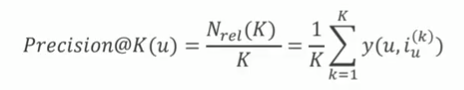

где i - i-ый объект в порядке оценки интереса пользователю u; y - оценка интереса пользователю (принимает значения 0 и 1).

Если взять третьего пользователя из данных выше, то precision на топ 3 рассчитывается следующим образом:

Шаг 1. Отсортировать фильмы по рейтингу.

In [ ]:
user_3 = full_stacked_films_rating[full_stacked_films_rating.user_id == 'user_3']
np.random.seed(42)
user_3['predictions'] = np.random.randint(0, 2, (user_3.shape[0],))
user_3 = user_3.sort_values('rating', ascending=False)
user_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,movie_name,rating,is_interest,predictions
15,user_3,Звёздные войны,5.0,1,0
16,user_3,1+1,5.0,1,1
11,user_3,Мстители,4.0,1,0
13,user_3,Девчата,4.0,1,0
14,user_3,Начало,3.0,0,0
12,user_3,Матрица,2.0,0,1


Шаг 2. Рассчитать precision, не забыв передать параметр топ k.

Мощность пересечения множеств равна 1, так как прогнозируемые величины совпали с реальностью, только один раз для фильма "1+1". Количество рекомендаций равно 3.

In [ ]:
1 / 3

0.3333333333333333

Если воспользоваться встроенной функцией, то ответ тот же

In [ ]:
from tensorflow.keras.metrics import Precision

p = Precision(top_k=3)
p.update_state(user_3.predictions, user_3.is_interest)
p.result().numpy()

0.33333334

Аналогичным образм можно рассчитать recall

In [ ]:
from tensorflow.keras.metrics import Recall

r = Recall(top_k=3)
r.update_state(user_3.predictions, user_3.is_interest)
r.result().numpy()

0.5

Однако precision на топ К элементах не учитывает порядок этих К элементов, то есть если модель верно прогнозирует только один элемент, то не важно какой он по счёту, первый или последний. К тому же, рассчёт ведётся для каждого пользователя в отдельности, что в реальности затруднительно.

> Mean Average Precision (MAP) компенсирует недостаток обычной precision. Данная метрика достигает максимума, если в топе наиболее интересные пользователю товары. Рассчёт ведётся по всем пользователям. Математически это выглядит следующим образом:

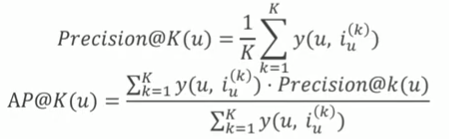

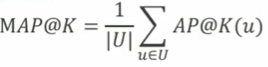

где U - множество пользователей

In [ ]:
!pip install tensorflow_ranking

In [ ]:
import tensorflow_ranking as tfr

map_metric = tfr.keras.metrics.MeanAveragePrecisionMetric()

In [ ]:
y_true = [list(full_stacked_films_rating.is_interest.astype(float).values)]
np.random.seed(42)
y_pred = [np.random.randint(0, 2, (len(y_true[0]),))]

map_metric(y_true, y_pred).numpy()

0.5958903

# Задание 3.

> 1. Добавьте в класс SparseSVD методы для получения похожих объектов, похожих пользователей и рассчёта метрик precision, recall.

> 2. Примените метод нахождения похожих объектов и выведите сообщение "Если вам понравился `films[item_id]`, обратите внимание на: `similar_items()`". `films[item_id]` - это фильм, относительно которого ведётся поиск похожих фильмов, его можно включить в выходной массив и его схожесть будет равна 1. Пусть `item_id = 1, N = 3`. Используйте данные MovieLens.

> 3. Также совершите поиск 3-ёх похожих на `user_1` пользователей.

> 4. Рассчитайте метрики precision, recall для user_1 для топ 5 фильмов на тестовой выборке, используя метод recommend, описанный в базовом классе SparseSVD. Учитывайте, что все методы, описанные в базовом классе, доступны и изнутри дочернего класса через self. На основе метрик сделайте вывод о качестве рекомендаций.

In [ ]:
# Код выполнения задания 3

class SparseSVD_modern(SparseSVD):
    """
    Обновлённый класс рекомендательной системы на базе матричного разложения
    с методами поиска похожих пользователей и объектов контента.
    """
    def similar_items(self, item_id: int, N: int = 5) -> list:
        """
        Метод поиска N похожих объектов контента (фильмов).
        """
        

    def similar_users(self, user_id: int, N: int = 5) -> list:
        """
        Метод поиска похожих пользователей.
        """

    def precision_top_k(self, y_true, y_pred, k: int) -> float:
        """
        Метод для рассчёта метрики precision по К объектам.
        """

    def recall_top_k(self, y_true, y_pred, k: int) -> float:
        """
        Метод для рассчёта метрики recall по К объектам.
        """
